# Project 2

## Setup 

Unzip the data from stas SA

In [ ]:
# download and update the data in the project
!./setup.sh 

In [ ]:
!pip install -r requirements.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal

from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols

import numpy as np                                

In [6]:
education_level_labels = [
    "Grade R/0",
    "Grade 1/Sub A/Class 1",
    "Grade 2/Sub B/Class 2",
    "Grade 3/Standard 1/ABET/AET 1",
    "Grade 4/Standard 2",
    "Grade 5/Standard 3/ABET/AET 2",
    "Grade 6/Standard 4",
    "Grade 7/Standard 5/ABET/AET 3",
    "Grade 8/Standard 6/Form 1",
    "Grade 9/Standard 7/Form 2/ABET/AET 4/NCV Level 1/OCCUPATIONAL CERTIFICATE - NQF LEVEL 1",
    "Grade 10/Standard 8/Form 3/NCV Level 2/OCCUPATIONAL CERTIFICATE – NQF LEVEL 2",
    "Grade 11/Standard 9/Form 4/NCV Level 3/OCCUPATIONAL CERTIFICATE – NQF LEVEL 3",
    "Grade 12/Standard 10/Form 5/National Senior Certificate/Matric/NCV Level 4/OCCUPATIONAL CERTIFICATE – NQF LEVEL 4",
    "NTC L/N1/NQF 1",
    "NTC LL/N2/NQF 2",
    "NTC LLL/N3/NQF 3",
    "N4/NTC 4/OCCUPATIONAL CERTIFICATE – NQF LEVEL 5",
    "N5/NTC 5/OCCUPATIONAL CERTIFICATE – NQF LEVEL 5",
    "N6/NTC 6/OCCUPATIONAL CERTIFICATE – NQF LEVEL 5",
    "Certificate with Less Than Grade 12/Standard 10",
    "Diploma with Less Than Grade 12/Standard 10",
    "Higher/National/Advance Certificate with Grade 12/Std 10/OCCUPATIONAL CERTIFICATE – NQF LEVEL 5",
    "Diploma with Grade 12/Standard 10/OCCUPATIONAL CERTIFICATE – NQF LEVEL 6",
    "Higher Diploma/OCCUPATIONAL CERTIFICATE (B-Tech Diploma) – NQF LEVEL 7",
    "Bachelor’s Degree/OCCUPATIONAL CERTIFICATE – NQF LEVEL 7",
    "Honours Degree/Postgraduate Diploma/OCCUPATIONAL CERTIFICATE – NQF LEVEL 8",
    "Post Higher Diploma (M-Tech and Master's Degree) – NQF LEVEL 9",
    "Doctoral Degrees (D-Tech and PhD) – NQF LEVEL 10",
    "Other Than Any of the Above",
    "Do Not Know",
]

other_education_labels = {
    98: "No Schooling",
    99: "Unspecified"
}

employment_labels = {
    1: "Employed",
    2: "Unemployed",
    3: "Not economically active",
    8: "Not applicable"
}

education_bins = {
    0: "No Formal Education",
    1: "Basic Education",
    2: "Intermediate Education",
    3: "Secondary Education",
    4: "Vocational Education",
    5: "Tertiary Education",
}
bin_mapping = {
    "No Schooling": {"value":0},
    "Grade R/0": {"value":1},
    "Grade 1/Sub A/Class 1": {"value":1},
    "Grade 2/Sub B/Class 2": {"value":1},
    "Grade 3/Standard 1/ABET/AET 1": {"value":1},
    "Grade 4/Standard 2": {"value":2},
    "Grade 5/Standard 3/ABET/AET 2": {"value":2},
    "Grade 6/Standard 4": {"value":2},
    "Grade 7/Standard 5/ABET/AET 3": {"value":2},
    "Grade 8/Standard 6/Form 1": {"value":2},
    "Grade 9/Standard 7/Form 2/ABET/AET 4/NCV Level 1/OCCUPATIONAL CERTIFICATE - NQF LEVEL 1": {"value":3},
    "Grade 10/Standard 8/Form 3/NCV Level 2/OCCUPATIONAL CERTIFICATE – NQF LEVEL 2": {"value":3},
    "Grade 11/Standard 9/Form 4/NCV Level 3/OCCUPATIONAL CERTIFICATE – NQF LEVEL 3": {"value":3},
    "Grade 12/Standard 10/Form 5/National Senior Certificate/Matric/NCV Level 4/OCCUPATIONAL CERTIFICATE – NQF LEVEL 4": {"value":3},
    "NTC L/N1/NQF 1": {"value":4},
    "NTC LL/N2/NQF 2": {"value":4},
    "NTC LLL/N3/NQF 3": {"value":4},
    "N4/NTC 4/OCCUPATIONAL CERTIFICATE – NQF LEVEL 5": {"value":4},
    "N5/NTC 5/OCCUPATIONAL CERTIFICATE – NQF LEVEL 5": {"value":4},
    "N6/NTC 6/OCCUPATIONAL CERTIFICATE – NQF LEVEL 5": {"value":4},
    "Certificate with Less Than Grade 12/Standard 10": {"value":3},
    "Diploma with Less Than Grade 12/Standard 10": {"value":3},
    "Higher/National/Advance Certificate with Grade 12/Std 10/OCCUPATIONAL CERTIFICATE – NQF LEVEL 5": {"value":5},
    "Diploma with Grade 12/Standard 10/OCCUPATIONAL CERTIFICATE – NQF LEVEL 6": {"value":5},
    "Higher Diploma/OCCUPATIONAL CERTIFICATE (B-Tech Diploma) – NQF LEVEL 7": {"value":5},
    "Bachelor’s Degree/OCCUPATIONAL CERTIFICATE – NQF LEVEL 7": {"value":5},
    "Honours Degree/Postgraduate Diploma/OCCUPATIONAL CERTIFICATE – NQF LEVEL 8": {"value":5},
    "Post Higher Diploma (M-Tech and Master's Degree) – NQF LEVEL 9": {"value":5},
    "Doctoral Degrees (D-Tech and PhD) – NQF LEVEL 10": {"value":5},
    "Unspecified":{"value": None},
    "Do Not Know":{"value": None}
}


base_output = "../report"

array= np.array(education_level_labels)

test = pd.DataFrame.from_dict(bin_mapping, orient="index")
test = test.reset_index().rename(columns={'index':'Education Level'})
test['index'] = test['Education Level'].apply(lambda x: np.where(array == x)[0][0] if x in array else next((k for k, v in other_education_labels.items() if v == x), None) if x in other_education_labels.values() else None)


test.head()

,Education Level,value,index
0,No Schooling,0.0,98
1,Grade R/0,1.0,0
2,Grade 1/Sub A/Class 1,1.0,1
3,Grade 2/Sub B/Class 2,1.0,2
4,Grade 3/Standard 1/ABET/AET 1,1.0,3


In [5]:
df = pd.read_csv("../data/GHS-2023-PERSON_F1.csv")
print(df.isnull().sum())

columns_to_convert = ['psu','employ_Status2','lab_amount','lab_sto', 'prov', 'Sex', 'age', 'age_grp1', 'hhc_relationship']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df["education-name"] = df['education'].map(lambda x: education_level_labels[x] if x < len(education_level_labels) else other_education_labels[x] if x in other_education_labels.keys() else None)

sex_mapping = {1: 'Male', 2: 'Female'}
df['Sex'] = df['Sex'].map(sex_mapping)
df = df.dropna()

uqnr              0
personnr          0
psu               0
prov              0
Four_by_Four      0
                 ..
lab_salary        0
employ_Status1    0
employ_Status2    0
rotation          0
person_wgt        0
Length: 112, dtype: int64


##### Hypothesis 1: Does the highest level of education affect the employed status of a working person?
 - **Null Hypothesis (H₀)**: Education level does not significantly affect the likelihood of being employed.
 - **Alternative Hypothesis (H₁)**: Education level significantly affects the likelihood of being employed.
    
To test this hypothesis, we performed a chi-square test of independence. Since both education level and income are categorical variables, the chi-square test is appropriate to evaluate whether there is a statistically significant association between these variables. Additionally, a logistic regression model was used to assess the predictive power of education level on income.

In [6]:
# setup environment
file_output = base_output+"/hypothesis_1/data"
image_output = base_output+"/hypothesis_1/images"

In [7]:
#clean and prepare data
income_data = df

income_data.loc[
    (income_data['employ_Status2'] <= 2) &
    (income_data['education'] != 29) & 
    (income_data['education'] != 99 )
    , 'education_category'] = income_data['education-name'].map(bin_mapping)
# map the labels of the education name to the the category of the education
 
income_data = income_data.dropna()

income_data.head()


,uqnr,personnr,psu,prov,Four_by_Four,Sex,age,age_grp1,Population,Languages,...,metro_code,metro,stratum,lab_salary,employ_Status1,employ_Status2,rotation,person_wgt,education-name,education_category
0,160100090000003901,1,16010009000,1,1,Male,80,16,2,1,...,1,2,10301,9475,1,1,3,646.795630,Diploma with Grade 12/Standard 10/OCCUPATIONAL...,5.0
2,160100090000007201,1,16010009000,1,1,Male,51,11,2,1,...,1,2,10301,2008,1,1,3,907.023646,Grade 11/Standard 9/Form 4/NCV Level 3/OCCUPAT...,3.0
3,160100090000007202,1,16010009000,1,1,Male,25,6,1,14,...,1,2,10301,3929,1,1,3,1566.659927,Grade 6/Standard 4,2.0
4,160100090000007202,2,16010009000,1,1,Female,23,5,1,14,...,1,2,10301,2997,1,1,3,1566.659927,Grade 5/Standard 3/ABET/AET 2,2.0
5,160100090000013801,1,16010009000,1,1,Male,51,11,2,1,...,1,2,10301,2997,1,1,3,1368.639236,Grade 7/Standard 5/ABET/AET 3,2.0


In [8]:
# # create a contingency table between education and employment status
contingency_table = pd.crosstab(income_data['education_category'], income_data['employ_Status2'])
contingency_table

employ_Status2,1,2
education_category,,
0.0,230,97
1.0,209,107
2.0,1920,1174
3.0,12336,7749
4.0,450,227
5.0,3705,649


In [9]:
# perform chi squared
chi2 = stats.chi2_contingency(contingency_table)

# save results as latex table
with open(f"{file_output}/hyp_1_chi_2.tex", "w") as f:
    res = pd.DataFrame({
        r'$\chi^2$': {"Value": r'{:.2f}'.format(chi2.statistic)},
        r'$p$': {"Value": r'{:.2f}'.format(chi2.pvalue)}
    })
    f.write(res.to_latex())


print(f"Chi-square statistic: {chi2.statistic:.2f}")
print(f"P-value: {chi2.pvalue:.4f}")

alpha = 0.05
if chi2.pvalue < alpha:
    print("Reject the null hypothesis (H₀): Education level significantly affects the likelihood being employed.")
else:
    print("Fail to reject the null hypothesis (H₀): Education level does not significantly affect the likelihood of being employed.")

Chi-square statistic: 905.29
P-value: 0.0000
Reject the null hypothesis (H₀): Education level significantly affects the likelihood being employed.


##### Perform a Logistic regression on the data

In [10]:
print(income_data.groupby(['education_category'])['employ_Status2'].count())

le = LabelEncoder()
X = sm.add_constant(income_data['education_category'])  # Add education as the independent X terms
y = income_data['employ_Status2'] - 1  # set employment status at the value to be predicted

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Summary of the model
with open(f"{file_output}/hyp_1_log_summary.tex", "w") as f:
    f.write(result.summary().as_latex())

result.summary()

education_category
0.0      327
1.0      316
2.0     3094
3.0    20085
4.0      677
5.0     4354
Name: employ_Status2, dtype: int64
Optimization terminated successfully.
         Current function value: 0.635305
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         employ_Status2   No. Observations:                28853
Model:                          Logit   Df Residuals:                    28851
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Sep 2024   Pseudo R-squ.:                 0.01560
Time:                        15:56:12   Log-Likelihood:                -18330.
converged:                       True   LL-Null:                       -18621.
Covariance Type:            nonrobust   LLR p-value:                2.302e-128
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4097      0.046      8.951      0.000       0.320       0.499
education_category    -0.3346      0.014    -23.366      0.000      -0.363      -0.307
======================================================================================
"""

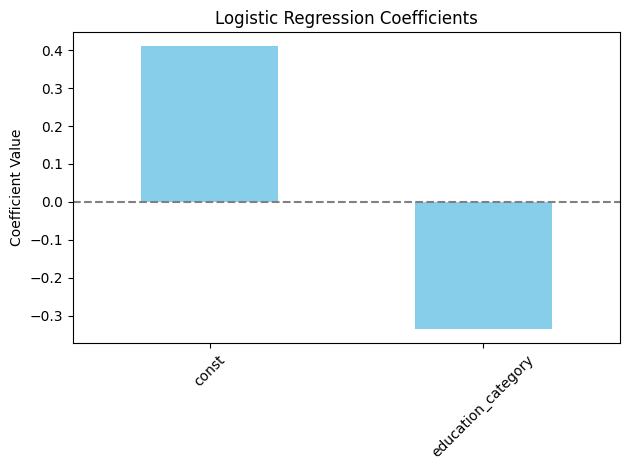

In [11]:
import matplotlib.pyplot as plt

# Prepare the coefficients for plotting
coef = result.params
coef.plot(kind='bar', color='skyblue')
plt.title('Logistic Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(f"{image_output}/hyp_1_log_coeff.pdf", format="pdf")
plt.show()



In [13]:
# Prepare the data for plotting

income_data['predicted_prob'] = result.predict(X)
income_data.loc[income_data['education_category'],"education_category_name"] = income_data['education_category'].replace(education_bins)

sorted_vals = income_data.sort_values(by='education_category', ascending=True)


plt.figure(figsize=(10, 6))
sns.barplot(x='education_category_name', y='predicted_prob', data=sorted_vals, ci=None, palette='Set2')
plt.title('Predicted Probability of Unemployment by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Predicted Probability of unemployed status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{image_output}/hyp_1_log_pred.pdf", format="pdf")
plt.show()

# Assuming df contains the 'income' and 'education_level' columns
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=sorted_vals, x='education-name', hue='employ_Status2', palette='Set1')

# Customize the plot
plt.title('Income Distribution Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend(title='Income Class', loc='upper right')

plt.tight_layout()
plt.savefig(f"{image_output}/hyp_1_income_dist.pdf", format="pdf")
plt.show()

/tmp/ipykernel_36397/2020376613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_data['predicted_prob'] = result.predict(X)


KeyError: '[1.0] not in index'

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, income_data['predicted_prob'])
roc_auc = roc_auc_score(y, income_data['predicted_prob'])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


##### Hypothesis 2: Does education level affect the salary?

- **Null Hypothesis**:
- **Alternative Hypothesis**:



In [60]:
file_output = base_output+"/hypothesis_2/data"
image_output = base_output+"/hypothesis_2/images"

In [61]:
# Cap the outliers at the 1st and 99th percentiles
lower_bound = income_data['lab_salary'].quantile(0.01)
upper_bound = income_data['lab_salary'].quantile(0.99)

# remove the extreme outliers from 0.1% on either side of the data 
income_data['lab_salary'] = np.where(income_data['lab_salary'] < lower_bound, lower_bound,
                                  np.where(income_data['lab_salary'] > upper_bound, upper_bound,
                                           income_data['lab_salary']))

In [ ]:
income_data = income_data[(income_data['lab_amount'] == 1)]
income_data['lab_salary'].describe()

In [63]:
def Test_normally_distributed(group1, name):
    ks_eval = stats.kstest(group1, 'norm', args=(np.mean(group1), np.std(group1)))
    print(f"Kolmogorov-Smirnov Test for {name}: W={ks_eval[0]}, p-value={ks_eval[1]}")

    with open(f"{file_output}/hyp_2_norm_dist_{name}.tex", "w") as f:
        res = pd.DataFrame({
            r"W": {"Value": ks_eval[0]},
            r"$p$": {"Value": ks_eval[1]}
        })
        f.write(res.to_latex())

    if ks_eval.pvalue <= 0.05:
        print(f"The data is not normally distributed")
    else:
        print("The data is normally distributed")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    stats.probplot(group1, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {name}')
    
    # plt.subplot(1, 2, 2)
    # sns.histplot(group1, kde=True)
    # plt.title(f'Hours Worked by {name} with KDE')

    plt.tight_layout()
    plt.savefig(f"{image_output}/hyp_2_norm_dist_{name}.pdf", format='pdf')
    plt.show()

In [ ]:
income_data = income_data[(income_data['lab_amount'] == 1) & (income_data['lab_salary'] < 88888888)]
income_data['education_category'] = income_data['education_category'].astype('category')

Test_normally_distributed(income_data["lab_salary"], "income data")

anova_model = ols('lab_salary ~ C(education_category)', data=income_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

anova_table

In [ ]:
from scipy.stats import levene
# Perform Levene's test
levene_test = levene(
                    *[group['lab_salary'] for name, group in income_data.groupby('education_category', observed=False)]
                    ) # Add more groups if necessary

with open(f"{file_output}/hyp_2_levene_test.tex", "w") as f:
    res = pd.DataFrame({
        r'levene statistic': {"Value": r'{:.2f}'.format(levene_test.statistic)},
        r'$p$': {"Value": r'{:.2f}'.format(levene_test.pvalue)}
    })
    f.write(res.to_latex())

print("Levene's Test for Homogeneity of Variances:")
print(f"Statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")

In [ ]:
groups = [group['lab_salary'].values for name, group in income_data.groupby('education_category', observed=False)]
kruskal_statistic, kruskal_p_value = kruskal(*groups)

print(kruskal_statistic)
kruskal_p_value

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

model = sm.OLS.from_formula('lab_salary ~ education_category', data=income_data).fit()
welch = anova_lm(model, robust='hc3')

with open(f"{file_output}/hyp_2_welch_res.tex", "w") as f:
    f.write(welch.to_latex(index=False, escape=True,float_format="%.3f"))

print(f"Welch's ANOVA statistic: {welch}")

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=income_data['lab_salary'], groups=income_data['education_category'], alpha=0.05)

with open(f"{file_output}/hyp_2_tukey.tex", "w") as f:
    tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], 
                        columns=tukey._results_table.data[0])
    
    latex_table = tukey_df.to_latex(float_format="%.4f",escape=True)
    f.write(latex_table)
# Display the results
print(tukey)

##### Hypothesis 3: Does Age affect the salary of a working person?
- **Null Hypothesis (H₀)**: Age does not significantly affect salary compensation.
- **Alternative Hypothesis (H₁)**: Age significantly affects salary compensation.

In [69]:
#setup environment
file_output = base_output+"/hypothesis_3/data"
image_output = base_output+"/hypothesis_3/images"

In [ ]:
income_data[['age', 'lab_salary', 'education_category']].head()

In [ ]:
from scipy.stats import pearsonr
corr_stat, p_value = pearsonr(income_data['age'], income_data['lab_salary'])

with open(f"{file_output}/hyp_3_pearson_test.tex", "w") as f:
    res = pd.DataFrame({
        r'Pearson correlation statistic': {"Value": r'{:.2f}'.format(corr_stat)},
        r'$p$': {"Value": r'{:.2f}'.format(p_value)}
    })
    f.write(res.to_latex())
print(f"Pearson Correlation: {corr_stat}, p-value: {p_value}")

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(income_data[['age']])

In [ ]:
X = sm.add_constant(X_scaled)  # Add constant for intercept
y = income_data['lab_salary']
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
robust_model = model.get_robustcov_results()

with open(f"{file_output}/hyp_3_log_summary.tex", "w") as f:
    f.write(result.summary().as_latex())

robust_model.summary()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=income_data, x='age', y='lab_salary', alpha=0.5)
sns.regplot(data=income_data, x='age', y='lab_salary', scatter=False, color='orange')
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.savefig(f"{image_output}/hyp_3_age_v_salary_scatter.pdf", format="pdf")
plt.show()

In [ ]:
age_bins = [0, 25, 35, 45, 55, 65, 75]
age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
income_data['age_group'] = pd.cut(income_data['age'], bins=age_bins, labels=age_labels)

# Box plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=income_data, x='age_group', y='lab_salary')
plt.title('Violin Plot of Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Salary')
plt.grid(True)
plt.savefig(f'{image_output}/hyp3_salary_by_age_violin.pdf', format="pdf")
plt.show()

In [ ]:
avg_salary_by_age = income_data.groupby('age_group')['lab_salary'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_salary_by_age, x='age_group', y='lab_salary', marker='o')
plt.title('Average Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.grid(True)
plt.savefig(f'{image_output}/hyp_3_average_salary.pdf', format="pdf")
plt.show()

In [ ]:
band_size = 500
cut_off = 20000

salary_bins = [i for i in range(0, cut_off + band_size, band_size)]
salary_labels = salary_bins[:len(salary_bins)-1]
# salary_labels = ['<20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K+']
income_data['salary_group'] = pd.cut(income_data['lab_salary'], bins=salary_bins, labels=salary_labels)


# Create a pivot table for heatmap
heatmap_data = pd.pivot_table(income_data, values='lab_salary', index='age_group', columns='salary_group', aggfunc='count')

# Heatmap
plt.figure(figsize=(25, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Age Group vs Salary Group')
plt.xlabel('Salary Group lower bound')
plt.ylabel('Age Group')
plt.savefig(f'{image_output}/hyp_3_heat_map.pdf')
plt.show()

In [ ]:
g = sns.FacetGrid(income_data, col="education_category_name", col_wrap=3, height=4, sharey=False)
g.map(sns.scatterplot, "age", "lab_salary", alpha=0.5)
g.map(sns.regplot, "age", "lab_salary", scatter=False, color='orange')
g.set_titles(template="{col_name}")
g.set_axis_labels("Age", "Salary (rands per month)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age vs Salary by Education Level')
plt.savefig(f'{image_output}/hyp_3_facet.pdf')
plt.show()

##### Hypothesis 4: Gender and equality
1. ***Gender and Salary***:
    - **Null Hypothesis (H₀)**: Gender does not significantly affect salary.
    - **Alternative Hypothesis (H₁)**: Gender significantly affects salary.

2. ***Gender and Education Level***:
    - **Null Hypothesis (H₀)**: Gender does not significantly affect education level.
    - **Alternative Hypothesis (H₁)**: Gender significantly affects education level.

In [31]:
male_salary = income_data[income_data['Sex'] == 'Male']['lab_salary']
female_salary = income_data[income_data['Sex'] == 'Female']['lab_salary']

In [ ]:
male_salary.describe()

In [ ]:
female_salary.describe()

In [ ]:
from scipy.stats import ttest_ind
# Separate the data into two groups based on gender
male_salary = income_data[income_data['Sex'] == 'Male']['lab_salary']
female_salary = income_data[income_data['Sex'] == 'Female']['lab_salary']

Test_normally_distributed(male_salary, "male-salary")
Test_normally_distributed(male_salary, "female-salary")

from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(male_salary, female_salary)

with open(f"{file_output}/hyp_4_t_test.tex", "w") as f:
    res = pd.DataFrame({
        r't\\-test statistic': {"Value": r'{:.2f}'.format(stat)},
        r'$p$': {"Value": r'{:.2f}'.format(p_value)}
    })
    f.write(res.to_latex())

print(f"Whiteney u statistic: {stat}, p-value: {p_value}")

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=income_data, x='Sex', y='lab_salary')
plt.title('Box Plot of Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid(True)
plt.savefig(f"{image_output}/hyp_4_violin.pdf", format="pdf")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(income_data['Sex'], income_data['education_category'])

# Perform the Chi-Squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

with open(f"{file_output}/hyp_4_t_test.tex", "w") as f:
    res = pd.DataFrame({
        r'$\chi^2$': {"Value": r'{:.2f}'.format(chi2_stat)},
        r'$p$': {"Value": r'{:.2f}'.format(p_value)}
    })
    f.write(res.to_latex())
print(f"Chi-Squared statistic: {chi2_stat}, p-value: {p_value}")

In [ ]:
education_gender_count = pd.crosstab(income_data['education_category'], income_data['Sex'])

# Plot the bar chart
education_gender_count.plot(kind='bar', figsize=(12, 6))
plt.title('Counts of Gender Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.savefig(f'{image_output}/hyp_4_bar_plot.pdf', format="pdf")
plt.show()

plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.subplot()
sns.histplot(male_salary, bins=30, kde=True)
plt.title('Histogram of Logged Salary')
plt.xlabel('Logged Salary')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot()
sns.histplot(female_salary, bins=30, kde=True)
plt.title('Histogram of Logged Salary')
plt.xlabel('Logged Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(f"{image_output}/hyp_4_kde_plot.pdf", format="pdf")
plt.show()

##### Hypothesis 5: Does ethnicity affect the salary of a working person? 
- **Null Hypothesis (H₀)**: There is no significant difference in salary based on race, controlling for education level.
- **Alternative Hypothesis (H₁)**: There is a significant difference in salary based on race, controlling for education level.

In [ ]:
groups = [group['lab_salary'].values for name, group in income_data.groupby('Population')]

for g in groups:
    Test_normally_distributed(g, f"population")


In [ ]:
from scipy.stats import kruskal
import scikit_posthocs as sp

H_statistic, p_value = kruskal(*groups)

with open(f"{file_output}/hyp_5_anova.tex", "w") as f:
    res = pd.DataFrame({
        r'Anova statistic': {"Value": r'{:.2f}'.format(H_statistic)},
        r'$p$': {"Value": r'{:.2f}'.format(p_value)}
    })
    f.write(res.to_latex())

print(f"Kruskal-Wallis H statistic: {H_statistic}, p-value: {p_value}")


dunn_results = sp.posthoc_dunn(income_data, val_col='lab_salary', group_col='Population', p_adjust='bonferroni')
print(dunn_results)

# If you find significant results, visualize the differences
plt.figure(figsize=(12, 6))
sns.violinplot(x='Population', y='lab_salary', data=income_data)
plt.title('Salary Distribution by Race')
plt.ylabel('Salary')
plt.xlabel('Race')
plt.grid(True)
plt.savefig(f'{image_output}/hyp_5_violin_plot.pdf', format="pdf")
plt.show()

In [ ]:
# Model: Salary ~ Race + Education Level
model = ols('lab_salary ~ C(Population) + C(education_category)', data=income_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

with open(f"{file_output}/hyp_5_anova_lm.tex", "w") as f:
    f.write(anova_table.to_latex(float_format="%.3f", escape=True))

print(anova_table)

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# Load your dataset

# Select relevant features for clustering
features = ['age', 'lab_salary']
X = income_data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
# X_scaled = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the elbow method
inertia = []
sil_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(X_scaled, labels))

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig(f"{image_output}/clustering_k_means_inertia.pdf", format="pdf")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_score, marker='o')
plt.title('Silhouette score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.savefig(f"{image_output}/clustering_k_means_sil.pdf", format="pdf")
plt.show()

# Choose the optimal number of clusters, e.g., 3
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
income_data['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=income_data, x='age', y='lab_salary', hue='Cluster', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('K-Means Clustering of age and salary')
plt.savefig(f"{image_output}/clustering_k_means.pdf", format="pdf")
# plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import gower

cluster_data = income_data[income_data["soc_grant"] < 3]

cluster_labels = ['age_group','education_category', 'Population', 'employ_Status2', "Sex", "soc_grant"]
cluster_data['Population'] = cluster_data['Population'].astype('str')
cluster_data['education_category'] = cluster_data['education_category'].astype('str')
cluster_data['employ_Status2'] = cluster_data['employ_Status2'].astype('str')
cluster_data['age_group'] = cluster_data['age_group'].astype('str')
cluster_data['soc_grant'] = cluster_data['soc_grant'].astype('str')
# print(cluster_data)

# from scipy.spatial.distance import pdist, squareform

gower_distance = gower.gower_matrix(cluster_data[cluster_labels])

linked = linkage(gower_distance, method='average')
dendrogram(linked, no_labels=True)
plt.savefig(f'{image_output}/clustering_dendrogram.pdf', format="pdf")
plt.show()


In [ ]:
silhouette_scores = []
for i in range(2, 11):
    clusters = fcluster(linked, i, criterion='maxclust')
    score = silhouette_score(gower_distance, clusters, metric='precomputed')  # Using precomputed Gower distance
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.savefig(f'{image_output}/clustering_dendro_sil.pdf', format="pdf")
plt.show()

In [ ]:
cluster_data["hierachy_clusters"] = fcluster(linked, 4, criterion='maxclust')

cluster_data